In [4]:
using Plots
using Flux
using StaticArrays

In [18]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.00*randn(n);

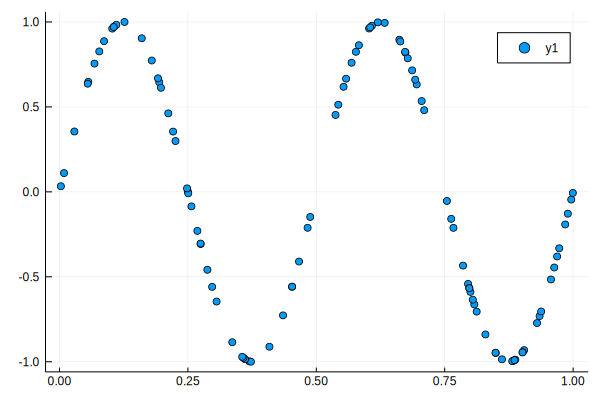

In [19]:
scatter(dx, dy)

In [20]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [33]:
loss(x, y) = Flux.mse(m(x), y)

loss (generic function with 1 method)

In [34]:
ps = Flux.params(m)

Params([Float32[-0.11294943; -0.32528305; … ; 0.03427965; -0.016331501], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.15628439 -0.025844507 … -0.18252678 9.4959025e-5; 0.18569687 0.062198747 … 0.19930772 -0.072688214; … ; 0.03486468 -0.0951118 … 0.14556757 -0.19578221; -0.23723748 -0.013870559 … 0.082891636 0.099870905], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.2388946 0.024270074 … -0.29650095 -0.07918653], Float32[0.0]])

In [35]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.26845020827721955], [-0.22978051267045846]) 
 ([0.9347553932633208], [-0.7310693541681766])   
 ([0.608206179383787], [0.97781413765351])       
 ([0.19420493714772125], [0.6450902875088056])   
 ([0.5580098200330406], [0.6661039131224644])    
 ([0.4528239914503509], [-0.5587113554666193])   
 ([0.33647729957069195], [-0.8850985853862079])  
 ([0.369822365921775], [-0.9978840800874834])    
 ([0.37268059019924094], [-0.9995752689973717])  
 ([0.10647322846513019], [0.9730209480683641])   
 ([0.9045849527307808], [-0.9316838352488022])   
 ([0.6616971117349904], [0.8955415843799626])    
 ([0.56869806277134], [0.7599819333122356])      
 ⋮                                               
 ([0.7980032274981288], [-0.567302349443925])    
 ([0.7669852471647172], [-0.2118259309374298])   
 ([0.9297577880120516], [-0.7724498143838485])   
 ([0.692614579961363], [0.6602311295689179])     
 ([0.00262802

710

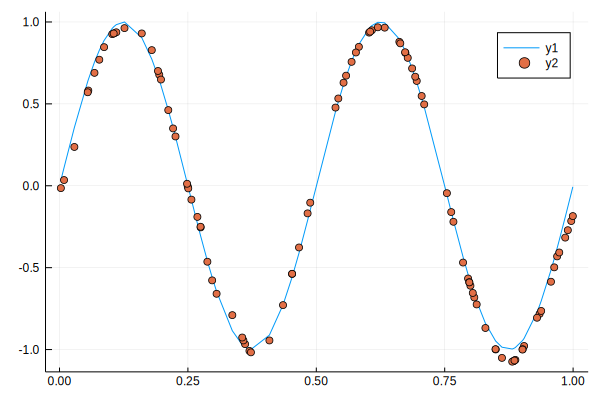

InterruptException: InterruptException:

In [36]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

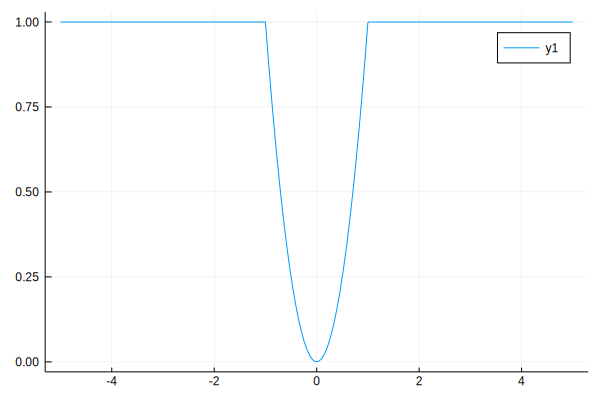

In [31]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [32]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(Dense(1, 50, mynl), Dense(50, 50, mynl), Dense(50, 1))

In [37]:
@which Dense(50,50, σ)

(::Type{Dense})(in::Integer, out::Integer, σ) in Flux at /home/zach/.julia/packages/Flux/2i5P1/src/layers/basic.jl:95